# Heart Attack Analytics & Prediction

In [47]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, classification_report, precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('heart_data.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
print(df.shape)

(918, 12)


## Data exploration

In [7]:
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.express as px

color_discrete_map = {0: 'red', 1: 'blue'}

# Create subplot figure
fig = sp.make_subplots(rows=3, cols=3, subplot_titles=[
    'Age Distribution', 'Sex Distribution', 'Exercise Induced Angina',
    'Chest Pain Type', 'Resting Blood Pressure by Target',
    'Fasting Blood Sugar', 'Resting Electrocardiographic Results'
])

# Add Age Histogram
age_hist = px.histogram(df, x='Age', color='HeartDisease', color_discrete_map=color_discrete_map, marginal="box")
for trace in age_hist.data:
    fig.add_trace(trace, row=1, col=1)

# Add Sex Count Plot
sex_hist = px.histogram(df, x='Sex', color='HeartDisease', color_discrete_map=color_discrete_map)
for trace in sex_hist.data:
    fig.add_trace(trace, row=1, col=2)

# Add Exercise Induced Angina Count Plot
exng_hist = px.histogram(df, x='ExerciseAngina', color='HeartDisease', color_discrete_map=color_discrete_map)
for trace in exng_hist.data:
    fig.add_trace(trace, row=1, col=3)

# Add Chest Pain Type Count Plot
cp_hist = px.histogram(df, x='ChestPainType', color='HeartDisease', color_discrete_map=color_discrete_map)
for trace in cp_hist.data:
    fig.add_trace(trace, row=2, col=1)

# Add Resting Blood Pressure Box Plot by Target
trtbps_box = px.box(df, x='HeartDisease', y='RestingBP', color='HeartDisease', color_discrete_map=color_discrete_map)
for trace in trtbps_box.data:
    fig.add_trace(trace, row=2, col=2)

# Add Fasting Blood Sugar Count Plot
fbs_hist = px.histogram(df, x='FastingBS', color='HeartDisease', color_discrete_map=color_discrete_map)
for trace in fbs_hist.data:
    fig.add_trace(trace, row=2, col=3)

# Add Resting Electrocardiographic Results Count Plot
restecg_hist = px.histogram(df, x='RestingECG', color='HeartDisease', color_discrete_map=color_discrete_map)
for trace in restecg_hist.data:
    fig.add_trace(trace, row=3, col=1)

# Update layout for the subplot figure
fig.update_layout(height=900, width=900, title_text="Heart Disease Data Visualization", showlegend=False)

# Show plot
fig.show()

## Binary Column

In [8]:
# take the data type that is object 

object_col = df.select_dtypes(include='object').columns

# turn object_col to binary data

df = pd.get_dummies(df, columns=object_col, drop_first=True)

In [9]:
df.sample(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
137,39,120,241,0,146,2.0,0,1,1,0,0,0,1,0,0,1
744,60,117,230,1,160,1.4,1,1,0,0,0,1,0,1,0,1
846,39,118,219,0,140,1.2,1,1,0,0,0,1,0,0,1,0
44,43,120,175,0,120,1.0,1,1,0,0,0,1,0,1,1,0
401,51,130,0,1,163,0.0,1,1,0,0,0,0,1,0,1,0


In [10]:
df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

## Split data

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size= 0.2, 
    stratify=y,
    random_state=123)

## Rescaling

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

In [13]:
from collections import Counter 

def class_perc(df): 
    lendata = len(df) 
    classes = Counter(df) 
    
    for sclass, freq in classes.items(): 
        perc = (freq / lendata) * 100 
        print(f"Class '{sclass}': {perc:.2f}%")  

class_perc(df['HeartDisease']) 

Class '0': 44.66%
Class '1': 55.34%


## Decision Tree Pruned

In [14]:
param_grid = {
    'classifier__max_depth': range(1, 20),
    'classifier__min_samples_split': range(2, 10),
    'classifier__min_samples_leaf': range(1, 10),
    'classifier__max_features': [None, 'sqrt', 'log2']
}


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(criterion="entropy"))
])

cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=cv_strategy, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Train the final model with the best parameters
best_params = grid_search.best_params_
tree_pruned = DecisionTreeClassifier(
    max_depth=best_params["classifier__max_depth"],
    min_samples_split=best_params["classifier__min_samples_split"],
    min_samples_leaf=best_params["classifier__min_samples_leaf"],
    max_features=best_params["classifier__max_features"],
    criterion="entropy"
)
tree_pruned.fit(X_train, y_train)

Fitting 10 folds for each of 4104 candidates, totalling 41040 fits
Best parameters found:  {'classifier__max_depth': 12, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 9, 'classifier__min_samples_split': 4}
Best cross-validation score: 0.85


DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features='sqrt',
                       min_samples_leaf=9, min_samples_split=4)

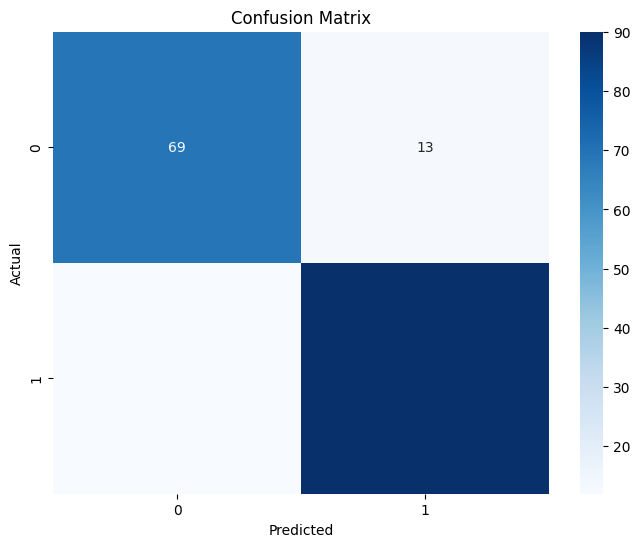

Accuracy: 0.8641304347826086
Precision: 0.8737864077669902
Recall: 0.8823529411764706
F1 Score: 0.8780487804878049
ROC AUC: 0.9237804878048781
Mean Squared Error: 0.1358695652173913
Mean Absolute Error: 0.1358695652173913


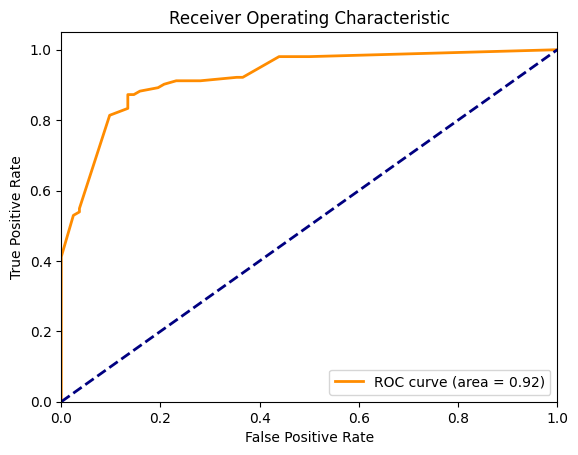

In [48]:
# Predictions
y_train_pred = tree_pruned.predict(X_train)
y_test_pred = tree_pruned.predict(X_test)
y_test_prob = tree_pruned.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, y_test_pred)
print(f"F1 Score: {f1}")

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)
print(f"ROC AUC: {roc_auc}")

# MSE
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_test_pred)
print(f"Mean Absolute Error: {mae}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [16]:
fpr = fpr.tolist()
tpr = tpr.tolist()

print(fpr)
print(tpr)
print(roc_auc)

[0.0, 0.0, 0.0, 0.0, 0.024390243902439025, 0.036585365853658534, 0.036585365853658534, 0.0975609756097561, 0.13414634146341464, 0.13414634146341464, 0.14634146341463414, 0.15853658536585366, 0.1951219512195122, 0.2073170731707317, 0.23170731707317074, 0.2804878048780488, 0.35365853658536583, 0.36585365853658536, 0.43902439024390244, 0.5, 1.0]
[0.0, 0.19607843137254902, 0.2647058823529412, 0.4117647058823529, 0.5294117647058824, 0.5392156862745098, 0.5490196078431373, 0.8137254901960784, 0.8333333333333334, 0.8725490196078431, 0.8725490196078431, 0.8823529411764706, 0.8921568627450981, 0.9019607843137255, 0.9117647058823529, 0.9117647058823529, 0.9215686274509803, 0.9215686274509803, 0.9803921568627451, 0.9803921568627451, 1.0]
0.9237804878048781


## Bagging

In [17]:
bgg_model = RandomForestClassifier(n_estimators=200, oob_score=True) # no max_features option=Bagging
bgg_model.fit(X_train, y_train)
accBagg=bgg_model.oob_score_

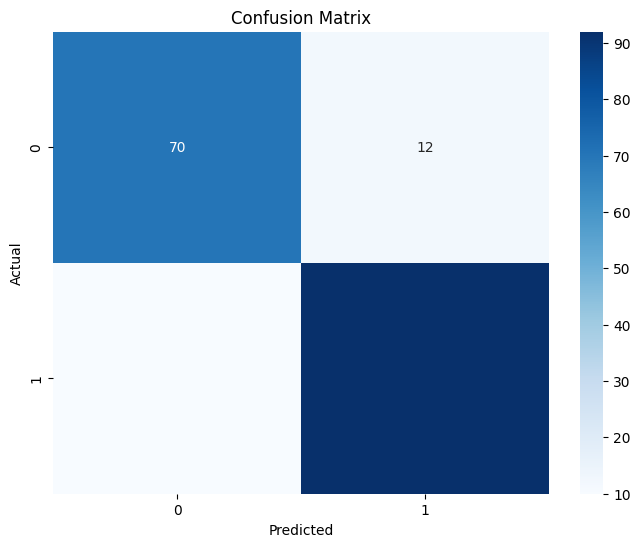

Accuracy: 0.8804347826086957
Precision: 0.8846153846153846
Recall: 0.9019607843137255
F1 Score: 0.8932038834951457
ROC AUC: 0.9353180296508847


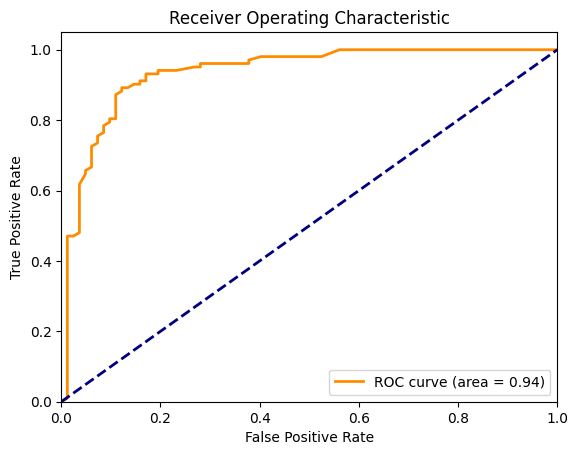

Cross-Validated ROC AUC: 0.9260099862210037 ± 0.023233893552752082
Cross-Validated Accuracy: 0.8692444761225945 ± 0.02955028109943844
Cross-Validated Precision: 0.8586042917829968 ± 0.03606956594035105
Cross-Validated Recall: 0.8997282081149292 ± 0.029710455684942086
Cross-Validated F1 Score: 0.8782953305477186 ± 0.024611013732295392


In [18]:
# Predictions
y_train_pred = bgg_model.predict(X_train)
y_test_pred = bgg_model.predict(X_test)
y_test_prob = bgg_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, y_test_pred)
print(f"F1 Score: {f1}")

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)
print(f"ROC AUC: {roc_auc}")

# MSE
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_test_pred)
print(f"Mean Absolute Error: {mae}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [19]:
fpr = fpr.tolist()
tpr = tpr.tolist()

print(fpr)
print(tpr)
print(roc_auc)

[0.0, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.024390243902439025, 0.036585365853658534, 0.036585365853658534, 0.036585365853658534, 0.036585365853658534, 0.036585365853658534, 0.036585365853658534, 0.036585365853658534, 0.036585365853658534, 0.04878048780487805, 0.04878048780487805, 0.06097560975609756, 0.06097560975609756, 0.06097560975609756, 0.07317073170731707, 0.07317073170731707, 0.08536585365853659, 0.08536585365853659, 0.0975609756097561, 0.0975609756097561, 0.10975609756097561, 0.10975609756097561, 0.12195121951219512, 0.12195121951219512, 0.13414634146341464, 0.14634146341463414, 0.15853658536585366, 0.15853658536585366, 0.17073170731707318, 0.17073170731707318, 0.1951219512195122, 0.1951219512195122, 0.23170731707317074, 0.2682926829268293, 0.2804878048

## Random Forest

In [20]:
rf_model = RandomForestClassifier(n_estimators=200, oob_score=True, max_features=10) # 62 explanatories
rf_model.fit(X_train, y_train)
accRF=rf_model.oob_score_

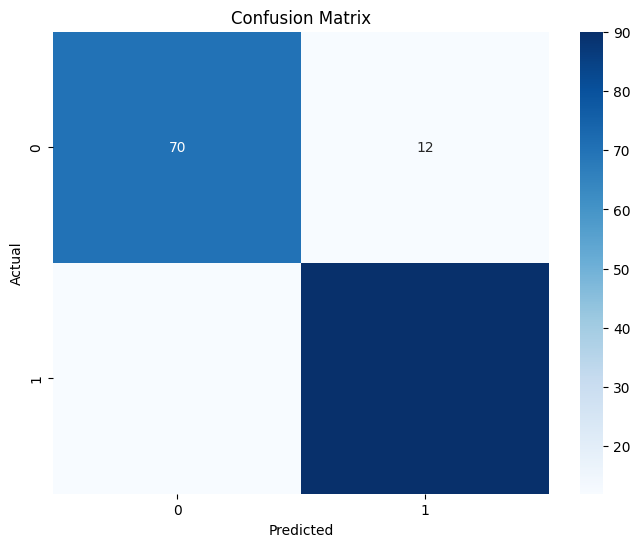

Accuracy: 0.8695652173913043
Precision: 0.8823529411764706
Recall: 0.8823529411764706
F1 Score: 0.8823529411764706
ROC AUC: 0.9257532281205165


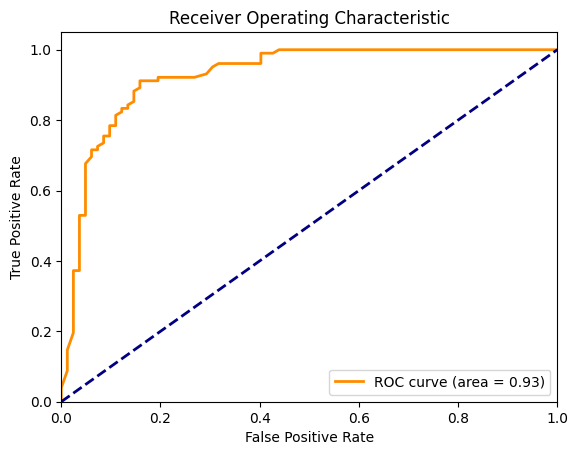

Cross-Validated ROC AUC: 0.9122888759464182 ± 0.031877477490163765
Cross-Validated Accuracy: 0.8463827512473271 ± 0.02572604678447036
Cross-Validated Precision: 0.8521495741741939 ± 0.035676448132448114
Cross-Validated Recall: 0.8839254513686663 ± 0.016486157606877185
Cross-Validated F1 Score: 0.8702570547986668 ± 0.018466719635199382


In [21]:
# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
y_test_prob = rf_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, y_test_pred)
print(f"F1 Score: {f1}")

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)
print(f"ROC AUC: {roc_auc}")

# MSE
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_test_pred)
print(f"Mean Absolute Error: {mae}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [22]:
confusion_matrix(y_test, rf_model.predict(X_test))

array([[70, 12],
       [12, 90]])

In [23]:

fpr = fpr.tolist()
tpr = tpr.tolist()

print(fpr)
print(tpr)
print(roc_auc)

[0.0, 0.0, 0.012195121951219513, 0.012195121951219513, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.036585365853658534, 0.036585365853658534, 0.036585365853658534, 0.036585365853658534, 0.036585365853658534, 0.036585365853658534, 0.036585365853658534, 0.04878048780487805, 0.04878048780487805, 0.04878048780487805, 0.04878048780487805, 0.04878048780487805, 0.04878048780487805, 0.04878048780487805, 0.04878048780487805, 0.06097560975609756, 0.06097560975609756, 0.07317073170731707, 0.07317073170731707, 0.08536585365853659, 0.08536585365853659, 0.0975609756097561, 0.0975609756097561, 0.10975609756097561, 0.10975609756097561, 0.12195121951219512, 0.12195121951219512, 0.13414634146341464, 0.13414634146341464, 0.14634146341463414, 0.14634146341463414, 0.15853658536585366, 0.15853658536585366, 0.1951219512195122, 0.1951219512195122, 0.21951219512195122, 0.26829268

## RF Grid

In [24]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

param_grid = {
    'min_samples_leaf' :[1,2,4,6,8,10], 
    'max_features' : [5,10,15,20,25],
}

RFGrid = GridSearchCV(rf_model, param_grid=param_grid, cv=10, scoring=accuracy_score, verbose=1) 
RFGrid.fit(X_train,y_train)
print("Best param: ", RFGrid.best_params_)
rfgrid_model = RandomForestClassifier(n_estimators=200, oob_score=True, 
                               max_features=RFGrid.best_params_["max_features"], 
                               min_samples_leaf=RFGrid.best_params_["min_samples_leaf"])
rfgrid_model.fit(X_train,y_train)
accRFGrid=rfgrid_model.oob_score_

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:988: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python

Best param:  {'max_features': 5, 'min_samples_leaf': 1}


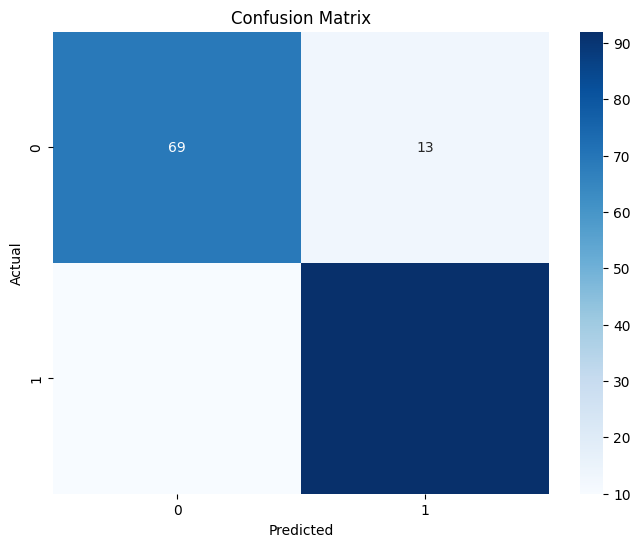

Accuracy: 0.875
Precision: 0.8761904761904762
Recall: 0.9019607843137255
F1 Score: 0.8888888888888888
Specificity: 0.8414634146341463
ROC AUC: 0.9326877092300334


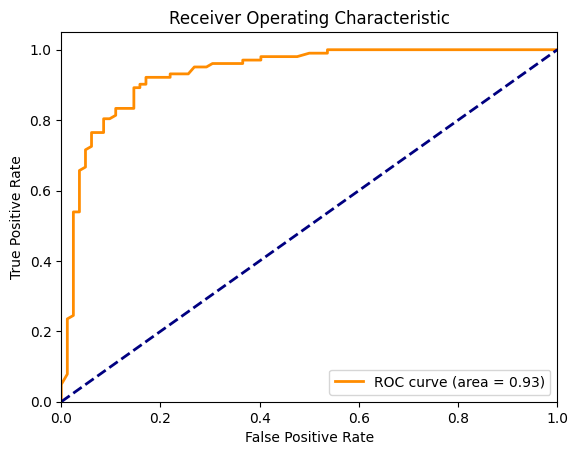

Cross-Validated ROC AUC: 0.923247321145314 ± 0.025036461925173746
Cross-Validated Accuracy: 0.8583808505583272 ± 0.030193165568883004
Cross-Validated Precision: 0.8575903271692745 ± 0.04220969330534635
Cross-Validated Recall: 0.8977285963890507 ± 0.022564756935297296
Cross-Validated F1 Score: 0.8818993406027396 ± 0.02058042914279706


In [25]:
# Predictions
y_train_pred = rfgrid_model.predict(X_train)
y_test_pred = rfgrid_model.predict(X_test)
y_test_prob = rfgrid_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, y_test_pred)
print(f"F1 Score: {f1}")

# print specificity values

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
specificity = tn / (tn+fp)
print(f"Specificity: {specificity}")

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)
print(f"ROC AUC: {roc_auc}")

# MSE
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_test_pred)
print(f"Mean Absolute Error: {mae}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [26]:
confusion_matrix(y_test, rf_model.predict(X_test))

array([[70, 12],
       [12, 90]])

In [27]:
fpr = fpr.tolist()
tpr = tpr.tolist()

print(fpr)
print(tpr)
print(roc_auc)

[0.0, 0.0, 0.0, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.012195121951219513, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.036585365853658534, 0.036585365853658534, 0.036585365853658534, 0.036585365853658534, 0.036585365853658534, 0.036585365853658534, 0.04878048780487805, 0.04878048780487805, 0.04878048780487805, 0.04878048780487805, 0.06097560975609756, 0.06097560975609756, 0.08536585365853659, 0.08536585365853659, 0.0975609756097561, 0.10975609756097561, 0.10975609756097561, 0.12195121951219512, 0.14634146341463414, 0.14634146341463414, 0.14634146341463414, 0.14634146341463414, 0.14634146341463414, 0.15853658536585366, 0.15853658536585366, 0.17073170731707318, 0.17073170731707318, 0.21951219512195122, 0.21951219512195122, 0.2560975609756097

## XGBoost

In [28]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


xgb = XGBClassifier(n_estimators=200)
xgb.fit(X_train, y_train)
predictions_XGBC = xgb.predict(X_test)
accBoost = accuracy_score(y_test, predictions_XGBC)

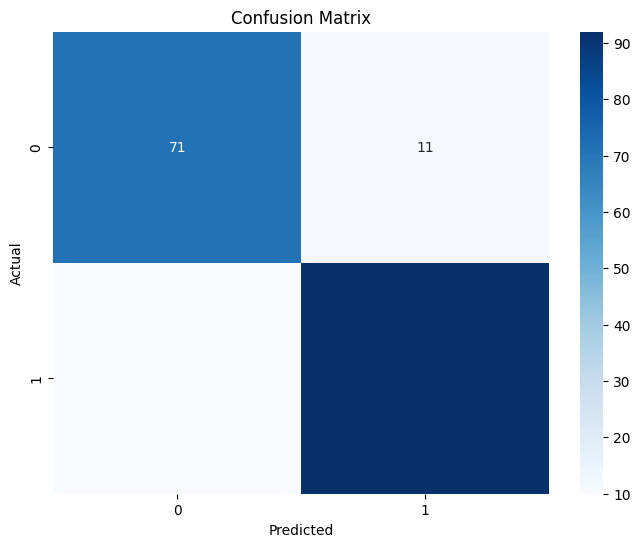

Accuracy: 0.8858695652173914
Precision: 0.8932038834951457
Recall: 0.9019607843137255
F1 Score: 0.8975609756097561
Specificity: 0.8658536585365854
ROC AUC: 0.9393830703012913


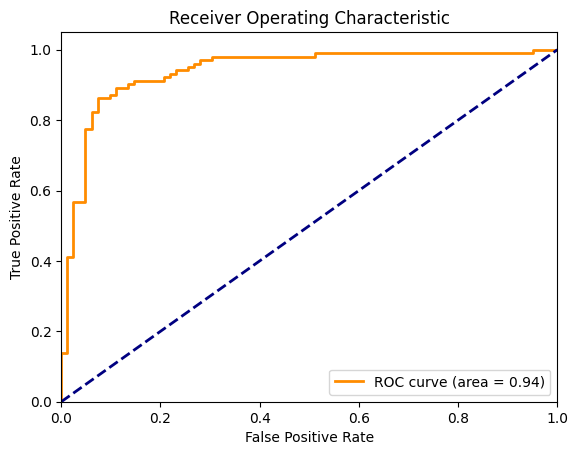

Cross-Validated ROC AUC: 0.9154073800493393 ± 0.021560661849755063
Cross-Validated Accuracy: 0.8496317415062962 ± 0.02375940988208121
Cross-Validated Precision: 0.8546372393694421 ± 0.036069819981883904
Cross-Validated Recall: 0.8799456416229858 ± 0.023604575883483886
Cross-Validated F1 Score: 0.8664730482285927 ± 0.019661161880933666


In [29]:
# Predictions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
y_test_prob = xgb.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, y_test_pred)
print(f"F1 Score: {f1}")

# print specificity values

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
specificity = tn / (tn+fp)
print(f"Specificity: {specificity}")

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)
print(f"ROC AUC: {roc_auc}")

# MSE
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_test_pred)
print(f"Mean Absolute Error: {mae}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [30]:
confusion_matrix(y_test, xgb.predict(X_test))

array([[71, 11],
       [10, 92]])

In [31]:
fpr = fpr.tolist()
tpr = tpr.tolist()

print(fpr)
print(tpr)
print(roc_auc)

[0.0, 0.0, 0.0, 0.012195121951219513, 0.012195121951219513, 0.024390243902439025, 0.024390243902439025, 0.04878048780487805, 0.04878048780487805, 0.06097560975609756, 0.06097560975609756, 0.07317073170731707, 0.07317073170731707, 0.0975609756097561, 0.0975609756097561, 0.10975609756097561, 0.10975609756097561, 0.13414634146341464, 0.13414634146341464, 0.14634146341463414, 0.14634146341463414, 0.2073170731707317, 0.2073170731707317, 0.21951219512195122, 0.21951219512195122, 0.23170731707317074, 0.23170731707317074, 0.25609756097560976, 0.25609756097560976, 0.2682926829268293, 0.2682926829268293, 0.2804878048780488, 0.2804878048780488, 0.3048780487804878, 0.3048780487804878, 0.5121951219512195, 0.5121951219512195, 0.9512195121951219, 0.9512195121951219, 1.0]
[0.0, 0.00980392156862745, 0.13725490196078433, 0.13725490196078433, 0.4117647058823529, 0.4117647058823529, 0.5686274509803921, 0.5686274509803921, 0.7745098039215687, 0.7745098039215687, 0.8235294117647058, 0.8235294117647058, 0.86

## XGBoost Grid

In [32]:
xgb_grid = XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'subsample': [0.6, 0.7, 1.0],
    'max_depth': [2, 3, 5, 7, 9], 
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'min_child_weight': [1, 3, 5],
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}

# Initialize GridSearchCV with StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=xgb_grid, param_grid=param_grid, scoring='accuracy', cv=cv_strategy, n_jobs=-1, verbose=3)

grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_params = grid_search.best_params_
xgboost_model = XGBClassifier(n_estimators=200, 
                            subsample=best_params["subsample"],
                            max_depth=best_params["max_depth"],
                            learning_rate=best_params["learning_rate"],
                            min_child_weight=best_params["min_child_weight"],
                            colsample_bytree=best_params["colsample_bytree"],
                            gamma=best_params["gamma"],
                            use_label_encoder=False, eval_metric='logloss')
xgboost_model.fit(X_train, y_train)

# Evaluate the model
predictions_XGB_grid = xgboost_model.predict(X_test)
accBoost_grid = accuracy_score(y_test, predictions_XGB_grid)
print("Accuracy test set of XGB Grid: {0:.2%}".format(accBoost_grid))

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits
[CV 1/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.001, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.728 total time=   0.0s
[CV 2/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.001, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.707 total time=   0.0s
[CV 3/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.001, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.646 total time=   0.0s
[CV 4/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.001, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.673 total time=   0.0s
[CV 5/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.001, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.685 total time=   0.0s
[CV 1/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.001, max_depth=2, min_child_weight=1, subsample=0.7;, score=0.721 total time=   0.0s
[CV 2/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.001,

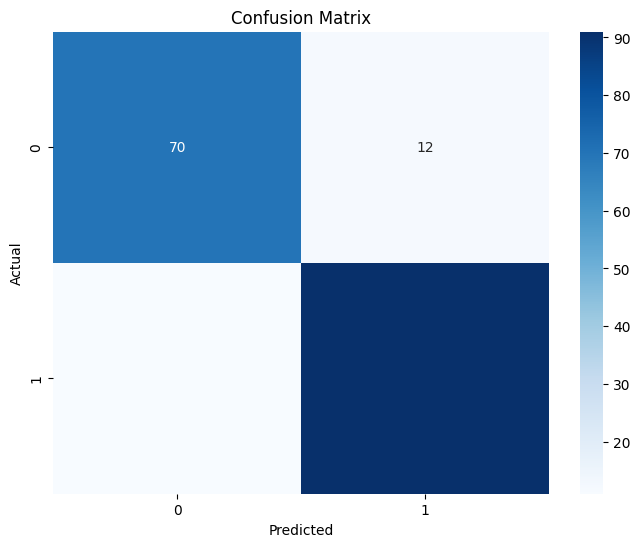

Accuracy: 0.875
Precision: 0.883495145631068
Recall: 0.8921568627450981
F1 Score: 0.8878048780487805
Specificity: 0.8536585365853658
ROC AUC: 0.937948350071736


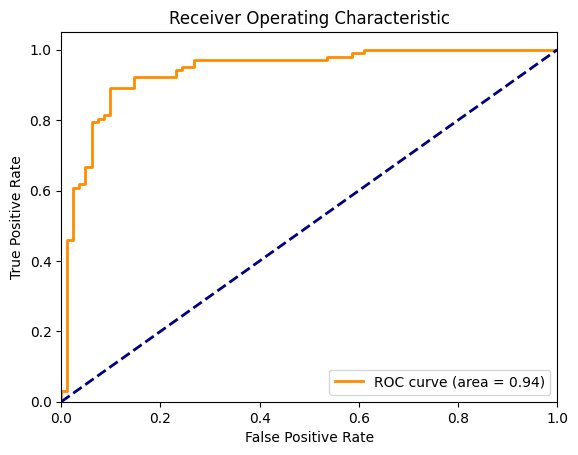

Cross-Validated ROC AUC: 0.929955348476024 ± 0.020801285088247048
Cross-Validated Accuracy: 0.8790864813494892 ± 0.016648261784001597
Cross-Validated Precision: 0.8799233509929671 ± 0.03295534918290866
Cross-Validated Recall: 0.907610172781984 ± 0.028561606424072978
Cross-Validated F1 Score: 0.8926840718133123 ± 0.013538822096832978


In [33]:
# Predictions
y_train_pred = xgboost_model.predict(X_train)
y_test_pred = xgboost_model.predict(X_test)
y_test_prob = xgboost_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, y_test_pred)
print(f"F1 Score: {f1}")

# print specificity values

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
specificity = tn / (tn+fp)
print(f"Specificity: {specificity}")

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)
print(f"ROC AUC: {roc_auc}")

# MSE
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_test_pred)
print(f"Mean Absolute Error: {mae}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [34]:
confusion_matrix(y_test, xgboost_model.predict(X_test))

array([[70, 12],
       [11, 91]])

In [35]:
fpr = fpr.tolist()
tpr = tpr.tolist()

print(fpr)
print(tpr)
print(roc_auc)

[0.0, 0.0, 0.0, 0.012195121951219513, 0.012195121951219513, 0.024390243902439025, 0.024390243902439025, 0.036585365853658534, 0.036585365853658534, 0.04878048780487805, 0.04878048780487805, 0.06097560975609756, 0.06097560975609756, 0.07317073170731707, 0.07317073170731707, 0.08536585365853659, 0.08536585365853659, 0.0975609756097561, 0.0975609756097561, 0.14634146341463414, 0.14634146341463414, 0.23170731707317074, 0.23170731707317074, 0.24390243902439024, 0.24390243902439024, 0.2682926829268293, 0.2682926829268293, 0.5365853658536586, 0.5365853658536586, 0.5853658536585366, 0.5853658536585366, 0.6097560975609756, 0.6097560975609756, 1.0]
[0.0, 0.00980392156862745, 0.029411764705882353, 0.029411764705882353, 0.46078431372549017, 0.46078431372549017, 0.6078431372549019, 0.6078431372549019, 0.6176470588235294, 0.6176470588235294, 0.6666666666666666, 0.6666666666666666, 0.7941176470588235, 0.7941176470588235, 0.803921568627451, 0.803921568627451, 0.8137254901960784, 0.8137254901960784, 0.

## Result

In [46]:
models = ['Bagging', 'Random Forests', 
          'Random Forests (Grid Search)', 'XGBClassifier', 'XGBClassifier (Grid Search)']

accuracy = [accBagg, accRF, accRFGrid, accBoost, accBoost_grid]

# Assign a unique color to each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Create a bar chart using Plotly
fig = go.Figure(data=[
    go.Bar(name='Accuracy', x=models, y=accuracy, marker=dict(color=colors))
])

# Update layout for better visualization
fig.update_layout(
    title='Accuracy of Different Models',
    xaxis_title='Models',
    yaxis_title='Accuracy',
    xaxis_tickangle=-45,
    yaxis_tickformat='.2%',
    height=600
)

# Show plot
fig.show()